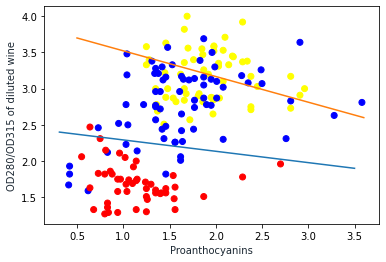

Misclassifications: 58
Error rate: 0.325


In [11]:
# Classification of wine data

import sklearn
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df = pd.read_csv("wine.csv",  
                  names=["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", " Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wine", "Proline"])
df["Class"].value_counts() 
X = df[["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", " Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wine", "Proline"]].values
Y = df[["Class"]].values
colors = ["yellow", "blue", "red"]
selector = SelectKBest(chi2, k=2).fit(X, Y)
bestTwo = selector.get_support(indices=True)
finalFeatures = df.iloc[:,bestTwo]
f1Name = list(finalFeatures.columns)[0]
f2Name = list(finalFeatures.columns)[1]
finalFeatureVectors = finalFeatures.to_numpy()
finalFeatureVectors
X1 = finalFeatureVectors[:,:1]
X2 = finalFeatureVectors[:, 1:]
plt.xlabel(f1Name, color='#1C2833')
plt.ylabel(f2Name, color='#1C2833')
plt.scatter(X1, X2, c=Y, cmap=matplotlib.colors.ListedColormap(colors))
x_coordinates1 = [0.31, 3.5]
y_coordinates1 = [2.4, 1.9]
plt.plot(x_coordinates1, y_coordinates1)
x_coordinates2 = [0.5,3.6]
y_coordinates2 = [3.7, 2.6]
plt.plot(x_coordinates2, y_coordinates2)
plt.show()
# The number of misclassifications made are: 58
# The error rate is 0.325 or 32.5%
print("Misclassifications: 58")
print("Error rate: 0.325")

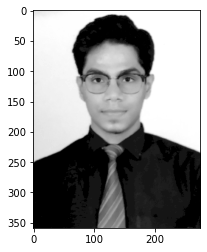

In [1]:
# Original image
import matplotlib.pyplot as plt
import cv2

im = cv2.imread("formalphoto.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(im, cmap='gray')

7


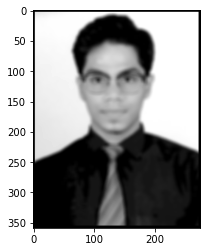

In [8]:
# Convolution with Gaussian blur filter

import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def getGaussianKernel(**kwargs):
    kernel = []
    n = kwargs['size']//2
    print(kwargs['size'])
    for i in range(-n, n+1):
        row = []
        for j in range(-n, n+1):
            row.append(1/(2*np.pi*kwargs['sd']**2*np.exp((i**2+j**2)/(2*kwargs['sd']**2)))) 
        kernel.append(row)
    return np.array(kernel)

def smoothen(image, kernel):
    imageHeight = image.shape[0]
    imageWidth = image.shape[1]
    kernelHeight = kernel.shape[0]
    kernelWidth = kernel.shape[1]
    smoothImage = y=np.zeros((imageHeight,imageWidth))
    for i in range(imageHeight - kernelHeight):
        for j in range(imageWidth - kernelWidth):
            smoothImage[i + kernelHeight//2][j + kernelWidth//2] = np.sum(np.multiply(image[i:i+kernelHeight, j:j+kernelWidth], kernel))
    return smoothImage
im = cv2.imread("formalphoto.png", cv2.IMREAD_GRAYSCALE)
type(im)

gaussianKernel = getGaussianKernel(size=7, sd=5)
im.size
gaussianKernel
plt.imshow(gaussianKernel)
smoothImage = smoothen(im, gaussianKernel)
plt.imshow(im, cmap='gray')
plt.imshow(gaussianKernel, cmap='gray')
plt.imshow(smoothImage, cmap='gray')
plt.imsave('smoothImage.png', smoothImage, cmap='gray')

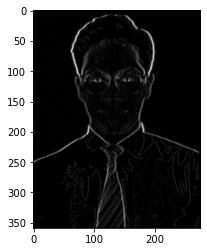

In [9]:
# Convolution with Sobel edge detector filter

import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def getSobelKernel(axis):
    if(axis == 0):
        kernel = np.array([[[-1,0,1], [-2,0,2], [-1,0,1]]])
    elif(axis == 1):
        kernel = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
    return kernel
    
def extractEdges(image, sobelKernelX, sobelKernelY):
    imageHeight = image.shape[0]
    imageWidth = image.shape[1]
    kernelHeight = sobelKernelX.shape[0]
    kernelWidth = sobelKernelX.shape[1]
    imageWithEdges = y=np.zeros((imageHeight,imageWidth))
    for i in range(imageHeight - kernelHeight):
        for j in range(imageWidth - kernelWidth):
            gx = np.sum(np.multiply(image[i:i+kernelHeight, j:j+kernelWidth], sobelKernelX))
            gy = np.sum(np.multiply(image[i:i+kernelHeight, j:j+kernelWidth], sobelKernelY))
            g = np.sqrt([gx**2 + gy**2])
            imageWithEdges[i][j] = g
    return imageWithEdges
image = cv2.imread("formalphoto.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
sobelKernelX = getSobelKernel(0)
sobelKernelY = getSobelKernel(1)
imageWithEdges = extractEdges(image, sobelKernelX, sobelKernelY)
plt.imshow(image, cmap='gray')
plt.imshow(imageWithEdges, cmap='gray')
plt.imsave('edgeImage.png', imageWithEdges, cmap='gray')